In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
#from torchmetrics.regression import MeanSquaredError
from os.path import dirname, abspath,join
import sys
#sys.path.append(dirname(dirname(abspath(__file__))))
sys.path.append("../")
from prochain_transformer.config import get_folders

# path_brutto = 'C:\\Users\\ScipioneFrancesco\\AppData\\Roaming\\Python\\Python311\\site-packages'
# if path_brutto in sys.path:
#     print("Path removed")
#     sys.path.remove(path_brutto)


DATA_DIR,INPUT_DIR,OUTPUT_DIR,_,_ = get_folders(key="local")


In [3]:
X_np = np.load(join(INPUT_DIR,"X_np.npy"))
Y_np = np.load(join(INPUT_DIR,"Y_np.npy"))
pred_val = torch.Tensor(np.load(join(OUTPUT_DIR,"pred_val.npy")))
true_val = torch.Tensor(np.load(join(OUTPUT_DIR,"true_val.npy")))
cross_att = np.load(join(OUTPUT_DIR,"cross_att.npy"))

In [4]:
print(f"{pred_val.shape} {true_val.shape}")

torch.Size([993, 250]) torch.Size([993, 250])


In [77]:
mse = nn.MSELoss(reduction="none")
error = torch.mean(mse(pred_val, true_val),dim=1)
min_idx = torch.argmin(error)
error[min_idx]

tensor(0.0007)

In [78]:
y_pred = pred_val[min_idx].numpy().astype(float)
y_true = true_val[min_idx].numpy().astype(float)
cross_att[min_idx][0,0,:,:].shape

(250, 1558)

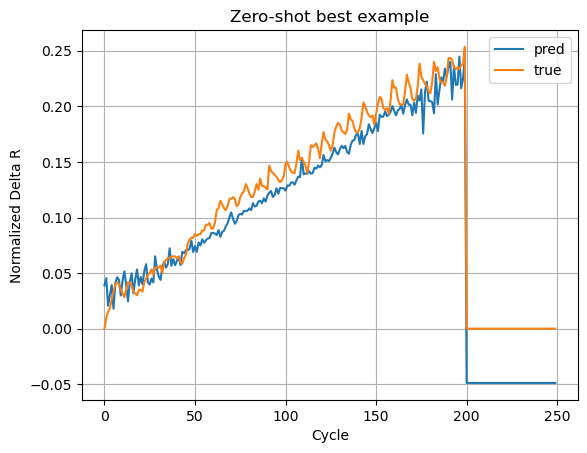

In [79]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(y_pred)),y_pred, label="pred")
ax.plot(np.arange(len(y_true)),y_true,label="true")
ax.set_xlabel("Cycle")
ax.set_ylabel("Normalized Delta R")
ax.set_title("Zero-shot best example")
ax.legend()
ax.grid(True)

In [80]:
cross_att_plot = cross_att[min_idx][0,0,:,:]
cross_att_plot

array([[4.2418594e-04, 4.6534871e-04, 4.4087923e-04, ..., 7.0813284e-32,
        7.0813284e-32, 7.0813284e-32],
       [4.2357630e-04, 4.6484749e-04, 4.4031281e-04, ..., 5.0529365e-32,
        5.0529365e-32, 5.0529365e-32],
       [4.2044735e-04, 4.6163984e-04, 4.3714937e-04, ..., 5.0299233e-32,
        5.0299233e-32, 5.0299233e-32],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.0303029e-03,
        3.0303029e-03, 3.0303029e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.0303029e-03,
        3.0303029e-03, 3.0303029e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.0303029e-03,
        3.0303029e-03, 3.0303029e-03]], dtype=float32)

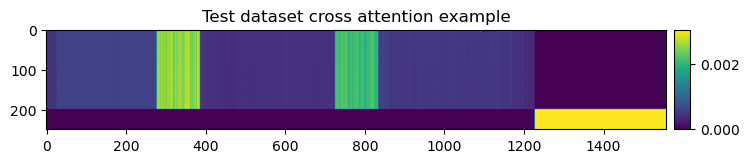

In [81]:
fig, ax = plt.subplots(figsize=(8,8))
ax = plt.gca()
im = ax.imshow(cross_att_plot)
ax.set_title("Test dataset cross attention example")
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax) # Similar to fig.colorbar(im, cax = cax)

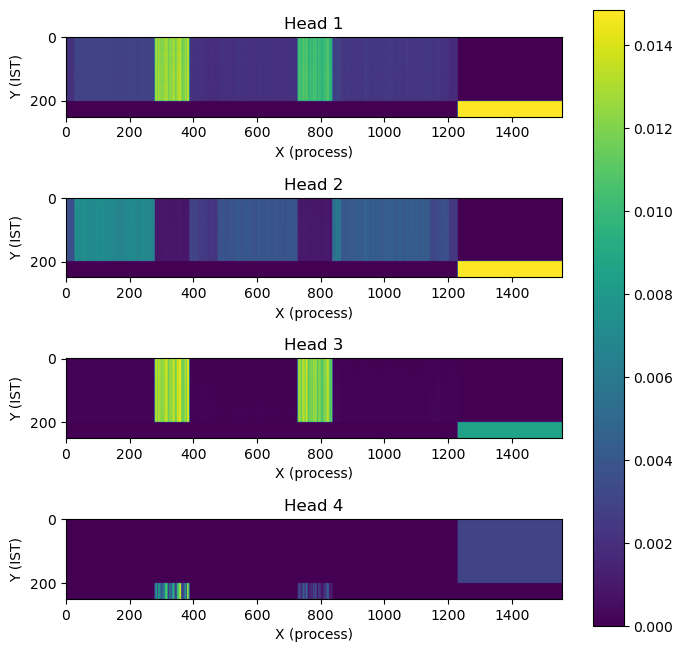

In [82]:
n_heads = 4

fig, ax = plt.subplots(n_heads,1,figsize=(8,8))
#ax = plt.gca()
for i in range(n_heads):
    im = ax[i].imshow(cross_att[min_idx][0,i,:,:])
    ax[i].set_title(f"Head {i+1}")
    ax[i].set_xlabel("X (process)")
    ax[i].set_ylabel("Y (IST)")
#cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im,ax=ax) # Similar to fig.colorbar(im, cax = cax)

Text(0.5, 1.0, 'Error Histogram')

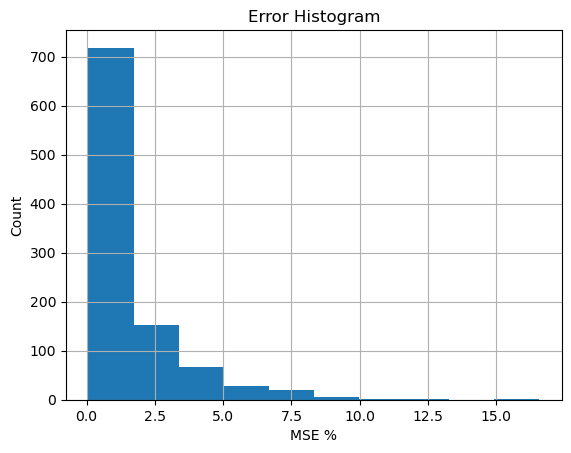

In [70]:
fig, ax = plt.subplots()
ax.grid(True)
ax.hist(error.numpy()*100)
ax.set_xlabel("MSE %")
ax.set_ylabel("Count")
ax.set_title("Error Histogram")
